In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


In [5]:
dataset = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')

In [14]:
!pip install sweetviz

     |████████████████████████████████| 323 kB 2.6 MB/s eta 0:00:01


In [15]:
import sweetviz

In [16]:
my_report=sweetviz.analyze([dataset,'Data'])

:FEATURES DONE:                    |                     | [  0%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [47]:
my_report

In [17]:
my_report.show_html('report.html')

In [18]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [21]:
print(X), print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


(None, None)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


(None, None, None, None)

1) Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [48]:
y_pred_log = logreg.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

[[22  5]
 [ 4 30]]


In [51]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_log))
print("Precision:",metrics.precision_score(y_test, y_pred_log))
print("Recall:",metrics.recall_score(y_test, y_pred_log))

Accuracy: 0.8524590163934426
Precision: 0.8571428571428571
Recall: 0.8823529411764706


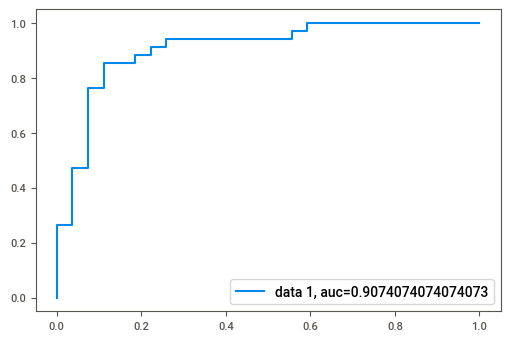

In [52]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.90. 
It means there is 90% chance that model will be able to distinguish between 1 and 0.

2) Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

In [54]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
y_pred_dtc = clf.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dtc)
print(cm)

[[22  5]
 [ 7 27]]


In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))
print("Precision:",metrics.precision_score(y_test, y_pred_dtc))
print("Recall:",metrics.recall_score(y_test, y_pred_dtc))

Accuracy: 0.8032786885245902
Precision: 0.84375
Recall: 0.7941176470588235


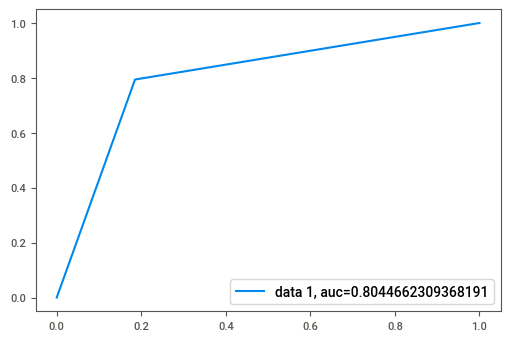

In [62]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.80. 
It means there is 80% chance that model will be able to distinguish between 1 and 0.

3) Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_rfc = clf.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)

[[22  5]
 [ 7 27]]


In [67]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:",metrics.precision_score(y_test, y_pred_rfc))
print("Recall:",metrics.recall_score(y_test, y_pred_rfc))

Accuracy: 0.8032786885245902
Precision: 0.84375
Recall: 0.7941176470588235


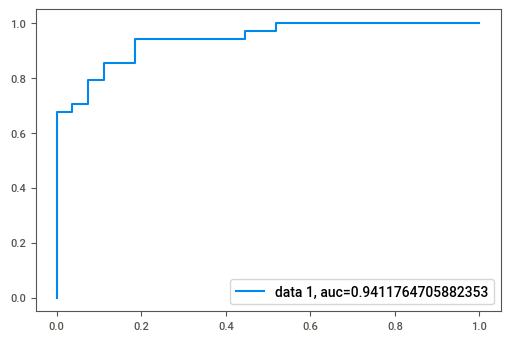

In [68]:
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.94. 
It means there is 94% chance that model will be able to distinguish between 1 and 0.

4) Artificial Neural Network

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [76]:
classifier = Sequential()

In [77]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

In [78]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [79]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [80]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [81]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5455
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5372
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5785
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5496
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5785
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.6157
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.6033
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.6405
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.6529
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.6364
Epoch 11/

25/25 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8430
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8636
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8430
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8430
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8388
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8347
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8223
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8388
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8306
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8388
Epoch 93/100


In [86]:
y_pred_ann = classifier.predict(X_test)
y_pred_output = (y_pred_ann > 0.5)

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_output)
print(cm)

[[22  5]
 [ 5 29]]


In [89]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_output))
print("Precision:",metrics.precision_score(y_test, y_pred_output))
print("Recall:",metrics.recall_score(y_test, y_pred_output))

Accuracy: 0.8360655737704918
Precision: 0.8529411764705882
Recall: 0.8529411764705882
